# Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('/content/drive/MyDrive/Datasets/BTC_5min_sample.csv')
data.head()

,timestamp,open,high,low,close,volume
0,2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
1,2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2,2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
3,2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
4,2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

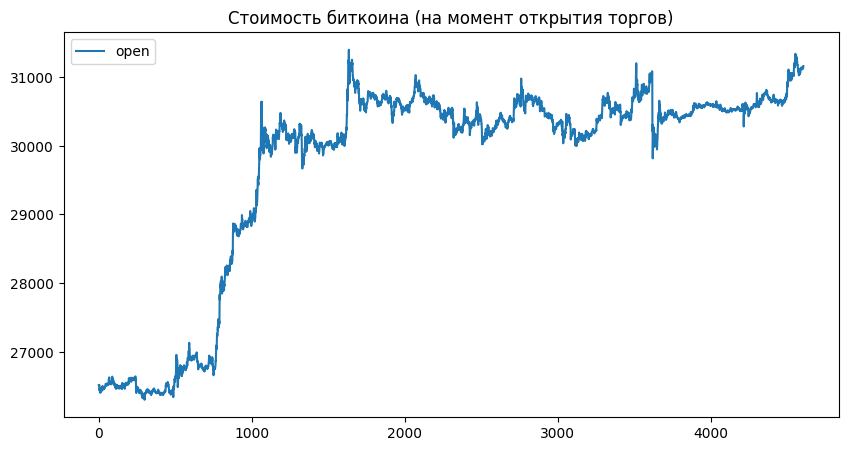

In [ ]:
data_1 = data
data = data[['open']]
data.plot(title="Стоимость биткоина (на момент открытия торгов)", figsize=(10, 5))
plt.show()

In [ ]:
data

,open
0,26519.10
1,26508.01
2,26511.30
3,26519.44
4,26513.33
...,...
4603,31126.23
4604,31127.02
4605,31136.55
4606,31134.94


Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Разрешается использовать функцию preprocess_data с лекционного материала (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [ ]:
from sklearn.model_selection import train_test_split

def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):
    # Разделение на тренировочную и тестовую выборки
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)

    # Создание лаговых признаков
    for i in range(lag_start, lag_end + 1):
        train_data[f'lag_{i}'] = train_data['open'].shift(i)
        test_data[f'lag_{i}'] = test_data['open'].shift(i)

    # Удаление пропусков
    train_data = train_data.dropna()
    test_data = test_data.dropna()

    # Разделение на признаки и целевую переменную
    X_train = train_data.drop(columns=['open'])
    y_train = train_data['open']
    X_test = test_data.drop(columns=['open'])
    y_test = test_data['open']

    return X_train, X_test, y_train, y_test

In [ ]:
# Применение препроцессинга данных
X_train, X_test, y_train, y_test = preprocess_data(data)

In [ ]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогнозирование
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Вычисление ошибки MAE на тренировочной и тестовой выборках
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE на test: {mae_test:.2f}')

MAE на test: 30.58


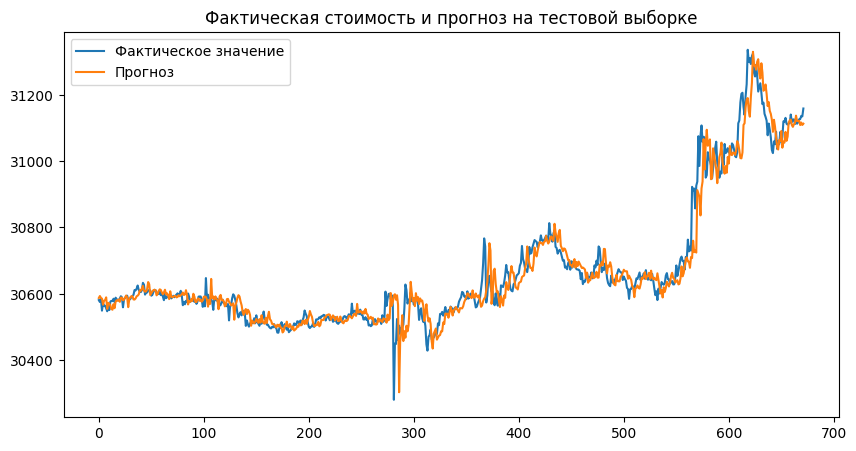

In [ ]:
# Визуализация результатов на тестовой выборке
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Фактическое значение')
plt.plot(y_test_pred, label='Прогноз')
plt.title('Фактическая стоимость и прогноз на тестовой выборке')
plt.legend()
plt.show()

In [ ]:
'''import pandas as pd
from sklearn.model_selection import train_test_split

def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15, ma_windows=[3, 7, 14]):
    # Extracting date and hour from timestamp
    data['date'] = data['timestamp'].dt.date
    data['hour'] = data['timestamp'].dt.hour

    # Splitting into training and testing sets
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)

    # Creating lagged features
    for i in range(lag_start, lag_end + 1):
        train_data[f'lag_{i}'] = train_data['open'].shift(i)
        test_data[f'lag_{i}'] = test_data['open'].shift(i)

    # Creating aggregated features
    # Daily mean
    daily_mean = train_data.groupby('date')['open'].transform('mean')
    train_data['daily_mean'] = daily_mean
    test_data['daily_mean'] = test_data.groupby('date')['open'].transform('mean')

    # Hourly mean
    hourly_mean = train_data.groupby(['date', 'hour'])['open'].transform('mean')
    train_data['hourly_mean'] = hourly_mean
    test_data['hourly_mean'] = test_data.groupby(['date', 'hour'])['open'].transform('mean')

    # Moving averages
    for window in ma_windows:
        train_data[f'ma_{window}'] = train_data['open'].rolling(window=window).mean()
        test_data[f'ma_{window}'] = test_data['open'].rolling(window=window).mean()

    # Dropping NaN values
    train_data = train_data.dropna()
    test_data = test_data.dropna()

    # Separating features and target variable
    X_train = train_data.drop(columns=['open', 'timestamp', 'date', 'hour'])
    y_train = train_data['open']
    X_test = test_data.drop(columns=['open', 'timestamp', 'date', 'hour'])
    y_test = test_data['open']

    return X_train, X_test, y_train, y_test

data['timestamp'] = pd.to_datetime(data_1['timestamp'])
X_train, X_test, y_train, y_test = preprocess_data(data, ma_windows=[3, 7, 14])

# Обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
'''

"import pandas as pd\nfrom sklearn.model_selection import train_test_split\n\ndef preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15, ma_windows=[3, 7, 14]):\n    # Extracting date and hour from timestamp\n    data['date'] = data['timestamp'].dt.date\n    data['hour'] = data['timestamp'].dt.hour\n\n    # Splitting into training and testing sets\n    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)\n\n    # Creating lagged features\n    for i in range(lag_start, lag_end + 1):\n        train_data[f'lag_{i}'] = train_data['open'].shift(i)\n        test_data[f'lag_{i}'] = test_data['open'].shift(i)\n\n    # Creating aggregated features\n    # Daily mean\n    daily_mean = train_data.groupby('date')['open'].transform('mean')\n    train_data['daily_mean'] = daily_mean\n    test_data['daily_mean'] = test_data.groupby('date')['open'].transform('mean')\n\n    # Hourly mean\n    hourly_mean = train_data.groupby(['date', 'hour'])['open'].transform('mean

In [ ]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15, ma_windows=[3, 7, 14]):
    # Extracting date and hour from timestamp
    data['date'] = data['timestamp'].dt.date
    data['hour'] = data['timestamp'].dt.hour
    data['week'] = data['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)

    # Splitting into training and testing sets
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)

    # Creating aggregated features only on training data
    # Daily mean
    daily_mean = train_data.groupby('date')['open'].mean().reset_index()
    daily_mean.columns = ['date', 'daily_mean']
    train_data = train_data.merge(daily_mean, on='date', how='left')

    # Hourly mean
    hourly_mean = train_data.groupby('hour')['open'].mean().reset_index()
    hourly_mean.columns = ['hour', 'hourly_mean']
    train_data = train_data.merge(hourly_mean, on='hour', how='left')

    # Weekly mean
    weekly_mean = train_data.groupby('week')['open'].mean().reset_index()
    weekly_mean.columns = ['week', 'weekly_mean']
    train_data = train_data.merge(weekly_mean, on='week', how='left')

    # Creating lagged features
    for i in range(lag_start, lag_end + 1):
        train_data[f'lag_{i}'] = train_data['open'].shift(i)

    # Apply the same aggregation features to test data
    test_data = test_data.merge(daily_mean, on='date', how='left')
    test_data = test_data.merge(hourly_mean, on='hour', how='left')
    test_data = test_data.merge(weekly_mean, on='week', how='left')

    for i in range(lag_start, lag_end + 1):
        test_data[f'lag_{i}'] = test_data['open'].shift(i)

    # Dropping NaN values
    train_data = train_data.dropna()
    test_data = test_data.dropna()

    # Separating features and target variable
    X_train = train_data.drop(columns=['open', 'timestamp', 'date', 'hour', 'week'])
    y_train = train_data['open']
    X_test = test_data.drop(columns=['open', 'timestamp', 'date', 'hour', 'week'])
    y_test = test_data['open']

    return X_train, X_test, y_train, y_test

# Preprocess data
data['timestamp'] = pd.to_datetime(data_1['timestamp'])
X_train, X_test, y_train, y_test = preprocess_data(data, ma_windows=[3, 7, 14])

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
# Вычисление ошибки MAE на тренировочной и тестовой выборках
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE на test: {mae_test:.2f}')

MAE на test: 11.40


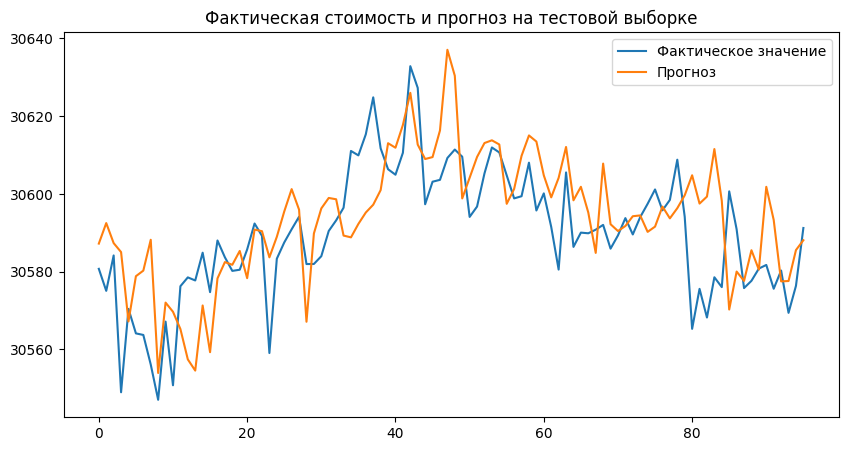

In [ ]:
# Визуализация результатов на тестовой выборке
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Фактическое значение')
plt.plot(y_test_pred, label='Прогноз')
plt.title('Фактическая стоимость и прогноз на тестовой выборке')
plt.legend()
plt.show()